In [1]:
import pandas as pd
import numpy as np
import spacy 
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from collections import defaultdict
import seaborn as sns

In [2]:
# Load EN language model

nlp = spacy.load('en_core_web_sm')


In [3]:
# Read data file into dataframe

df = pd.read_csv('Amazon_product_reviews.csv')
df.head()


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5000 non-null   object 
 1   dateAdded            5000 non-null   object 
 2   dateUpdated          5000 non-null   object 
 3   name                 5000 non-null   object 
 4   asins                5000 non-null   object 
 5   brand                5000 non-null   object 
 6   categories           5000 non-null   object 
 7   primaryCategories    5000 non-null   object 
 8   imageURLs            5000 non-null   object 
 9   keys                 5000 non-null   object 
 10  manufacturer         5000 non-null   object 
 11  manufacturerNumber   5000 non-null   object 
 12  reviews.date         5000 non-null   object 
 13  reviews.dateAdded    1052 non-null   object 
 14  reviews.dateSeen     5000 non-null   object 
 15  reviews.doRecommend  5000 non-null   b

In [5]:
# Select reviews.text column from dataset for analysis
reviews_data = df[['reviews.text']].dropna()
reviews_data.info()
reviews_data.head()
#clean_data = df.dropna(subset = ['reviews.text'])
#clean_data.isnull().sum()
#clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   reviews.text  5000 non-null   object
dtypes: object(1)
memory usage: 39.2+ KB


,reviews.text
0,I thought it would be as big as small paper bu...
1,This kindle is light and easy to use especiall...
2,Didnt know how much i'd use a kindle so went f...
3,I am 100 happy with my purchase. I caught it o...
4,Solid entry level Kindle. Great for kids. Gift...


In [6]:
# Preprocessing for data

def preprocess(text):
    doc = nlp(text)
    return ' '.join([token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct])

# Function to convert preprocessed text to a SpaCy doc (which inherently contains a vector)
def get_doc(text):
    return nlp(text)
    

In [7]:
# Only use a small subset of the data
reviews_data = reviews_data.sample(5000, random_state = 42)


In [8]:
reviews_data['processed_text'] = reviews_data['reviews.text'].apply(preprocess)
reviews_data['doc'] = reviews_data['processed_text'].apply(get_doc)
  

In [9]:
reviews_data.head()


,reviews.text,processed_text,doc
1501,IFeel confident purchasing products from Best ...,ifeel confident purchasing product best buy pr...,"(ifeel, confident, purchasing, product, best, ..."
2586,Great tablet for my 3 yr old. Love the profile...,great tablet 3 yr old love profile option pare...,"(great, tablet, 3, yr, old, love, profile, opt..."
2653,This tablet is great for small kids because it...,tablet great small kid protect preloade game a...,"(tablet, great, small, kid, protect, preloade,..."
1055,Great sound and function! ‚ù§Ô∏è Alexa! The co...,great sound function ù§ô∏è alexa color style s...,"(great, sound, function, ù§ô∏è, alexa, color, ..."
705,Echo Show is a great addition to any home and ...,echo great addition home thrilled buy child fa...,"(echo, great, addition, home, thrilled, buy, c..."


In [10]:
# Function to analyse polarity score of reviews
def analyse_polarity(text):
    
    # Analyze sentiment with TextBlob
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    
    return polarity


# Function to get sentiment 

def polarity_score(polarity):
    if polarity > 0:
        sentiment = 'positive'
    elif polarity < 0:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'
    
    return sentiment

def polarity_strength(polarity):
    if polarity == 1:
        strength = 'Very Positive'
    elif (polarity > 0 and polarity < 1):
        strength = 'Positive'
    elif polarity == 0:
        strength = 'Neutral'
    elif ( polarity < 0 and polarity > -1 ):
        strength = 'Negative'
    elif polarity == -1:
        strength = 'Very Negative'    
    return strength

In [11]:
# Get the polarity score, Sentiment(positive, negative and neutral) and polarity strength on review in separate columns

reviews_data['polarity_score'] = reviews_data['processed_text'].apply(analyse_polarity)

reviews_data['sentiment'] = reviews_data['polarity_score'].apply(polarity_score)

reviews_data['strength'] = reviews_data['polarity_score'].apply(polarity_strength)

In [12]:
reviews_data.head(20)

,reviews.text,processed_text,doc,polarity_score,sentiment,strength
1501,IFeel confident purchasing products from Best ...,ifeel confident purchasing product best buy pr...,"(ifeel, confident, purchasing, product, best, ...",0.750000,positive,Positive
2586,Great tablet for my 3 yr old. Love the profile...,great tablet 3 yr old love profile option pare...,"(great, tablet, 3, yr, old, love, profile, opt...",0.466667,positive,Positive
2653,This tablet is great for small kids because it...,tablet great small kid protect preloade game a...,"(tablet, great, small, kid, protect, preloade,...",0.030000,positive,Positive
1055,Great sound and function! ‚ù§Ô∏è Alexa! The co...,great sound function ù§ô∏è alexa color style s...,"(great, sound, function, ù§ô∏è, alexa, color, ...",0.534091,positive,Positive
705,Echo Show is a great addition to any home and ...,echo great addition home thrilled buy child fa...,"(echo, great, addition, home, thrilled, buy, c...",0.700000,positive,Positive
106,I purchased this for my daughter and when I te...,purchase daughter tell happy hug box box,"(purchase, daughter, tell, happy, hug, box, box)",0.800000,positive,Positive
589,Can use many differents apps from the Echo Sho...,use different app echo awesome product,"(use, different, app, echo, awesome, product)",0.500000,positive,Positive
2468,Bought for my eight year old. She absolutely l...,buy year old absolutely love,"(buy, year, old, absolutely, love)",0.300000,positive,Positive
2413,i bought this as a backup. I am currently usin...,buy backup currently headphone,"(buy, backup, currently, headphone)",0.000000,neutral,Neutral
1600,Great tablet for destructive toddlers. My son ...,great tablet destructive toddler son drop thro...,"(great, tablet, destructive, toddler, son, dro...",0.100000,positive,Positive


In [13]:
# Find the similarity between 2 reviews
# randomly selecting rows 5 and 10

similarity = reviews_data['doc'][5].similarity(reviews_data['doc'][10])
print(f"Cosine Similarity: {similarity}")

Cosine Similarity: 0.8391187734759646


C:\Users\dev\AppData\Local\Temp\ipykernel_5000\743590180.py:4: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  similarity = reviews_data['doc'][5].similarity(reviews_data['doc'][10])


In [14]:
# Visualise polarity and sentiment analysis

# Initialize dictionaries to hold positive and negative words
positive_words = defaultdict(int)
negative_words = defaultdict(int)


for sentence in reviews_data['processed_text']:
    words = sentence.split()

    for word in words:
        blob = TextBlob(word)
        polarity = blob.sentiment.polarity

        if polarity > 0:
            positive_words[word.lower()] += 1
        elif polarity < 0:
            negative_words[word.lower()] += 1

pos_wordcloud = WordCloud(width=400, height=200, background_color ='white').generate_from_frequencies(positive_words)
neg_wordcloud = WordCloud(width=400, height=200, background_color ='white').generate_from_frequencies(negative_words)



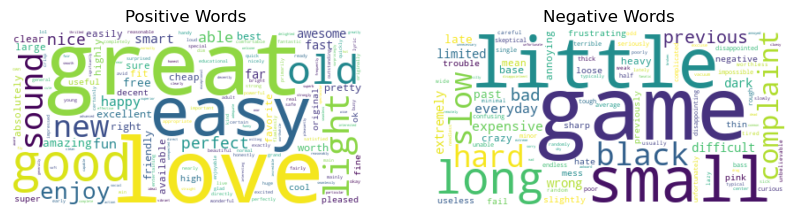

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(pos_wordcloud, interpolation='bilinear')
ax[0].set_title('Positive Words')
ax[0].axis('off')

ax[1].imshow(neg_wordcloud, interpolation='bilinear')
ax[1].set_title('Negative Words')
ax[1].axis('off')

plt.show()

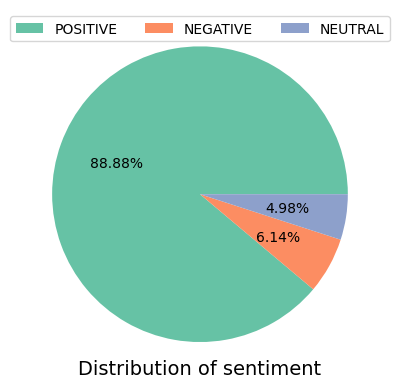

In [16]:
labels = ['POSITIVE', 'NEGATIVE', 'NEUTRAL']
#colors = ['G', 'R', 'B']
plt.pie(reviews_data['sentiment'].value_counts(), autopct='%0.2f%%',colors=sns.color_palette('Set2'))

plt.title('Distribution of sentiment', size=14, y=-0.01)
plt.legend(labels, ncol=17, loc=9)
plt.show()